<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS4erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS4**
 1. may want to use some extra fancy stuff like advanced matplotlib or plotly
2. BUT even more important to have solid story (just with basic mpl); again: idea and story matter most and simplicity first
3. i’d say this is key ps; we already did plenty and you should have a good command, but yet we still have couple weeks to go so
you still can fix it up and or beef it up; i’ll go carefully through it and let you know where we stand

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

In [ ]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

#**Scatter plot - Crime vs Budgets 2020 - 2022 - New Jersey**

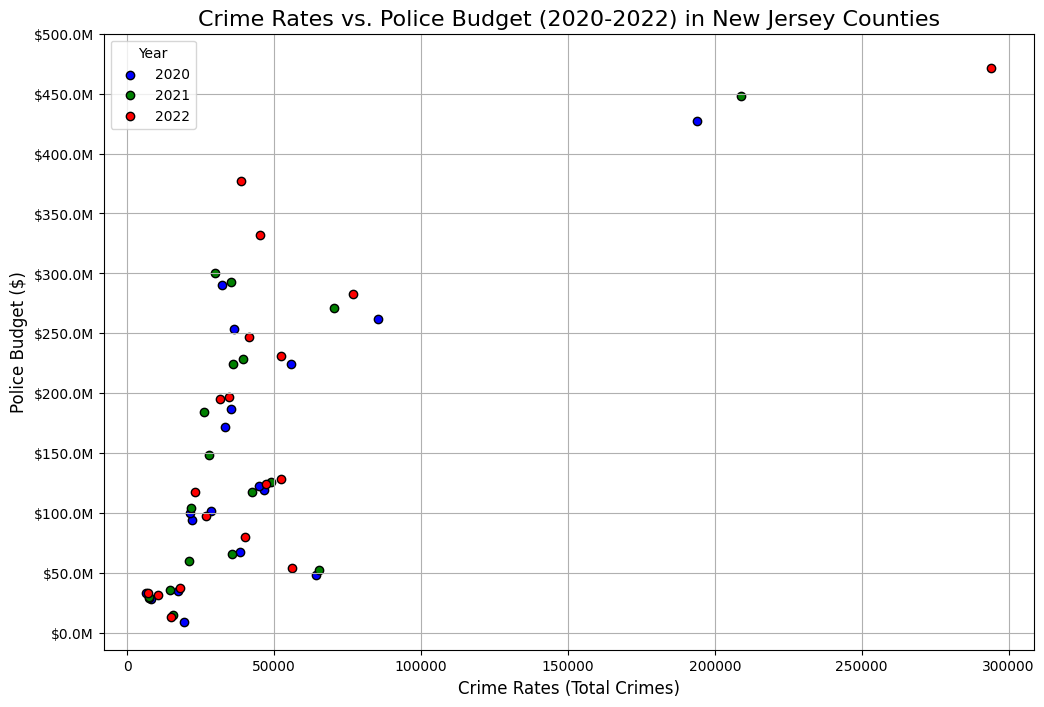

In [ ]:
import pandas as pd
import numpy as np

# Load the crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter out the 'Total New Jersey' row as it is not relevant for county-level analysis
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Convert crime data values to integers (remove commas)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

# Convert budget data values to floats (remove commas)
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Merge crime and budget data for the years 2020, 2021, and 2022
merged_data_2020 = pd.merge(crime_data[['County', '2020']], budget_data[['County', '2020']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2021 = pd.merge(crime_data[['County', '2021']], budget_data[['County', '2021']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2022 = pd.merge(crime_data[['County', '2022']], budget_data[['County', '2022']], on='County', suffixes=('_Crime', '_Budget'))

# Create a scatter plot for 2020, 2021, and 2022
plt.figure(figsize=(12, 8))

# Plot for 2020
plt.scatter(merged_data_2020['2020_Crime'], merged_data_2020['2020_Budget'], color='blue', label='2020', edgecolor='black')

# Plot for 2021
plt.scatter(merged_data_2021['2021_Crime'], merged_data_2021['2021_Budget'], color='green', label='2021', edgecolor='black')

# Plot for 2022
plt.scatter(merged_data_2022['2022_Crime'], merged_data_2022['2022_Budget'], color='red', label='2022', edgecolor='black')

# Add labels and title
plt.title('Crime Rates vs. Police Budget (2020-2022) in New Jersey Counties', fontsize=16)
plt.xlabel('Crime Rates (Total Crimes)', fontsize=12)
plt.ylabel('Police Budget ($)', fontsize=12)

# Add a legend to distinguish between the years
plt.legend(title='Year')

# Set Y-axis ticks to show ranges for the police budget (in increments of $50 million)
y_ticks = np.arange(0, max(merged_data_2022['2022_Budget']) + 50000000, 50000000)
plt.yticks(y_ticks, [f'${x/1e6:.1f}M' for x in y_ticks])

# Show grid and the plot
plt.grid(True)
plt.show()


**Interpretation**

**Outliers in Crime Rates and Police Budgets:**
**Bergen:** With consistently high crime rates and a large police budget, Bergen stands out as an outlier with both high crime and a high police budget, particularly in 2022. The crime rate and budget are much higher compared to other counties.

**Camden:** Camden also stands out with a notably high crime rate in 2022, accompanied by a significant increase in the police budget. This shows that while crime increased, Camden is allocating more resources to combat it.

**Essex:** Essex has a very high police budget, especially in 2021, but the crime rates are relatively high as well. Essex stands out due to the large gap between the crime rate and the police budget.

**Salem:** Salem is an outlier on the lower end with a significantly lower budget and crime rate. Despite a lower budget, its crime rates are not proportionally high, indicating potential underfunding for crime control in a low-crime area.

**Cape May and Hunterdon:** These counties are outliers in the opposite direction. Both have low crime rates and low police budgets. Despite having relatively low crime, their smaller budgets may suggest that the resources allocated are not sufficient to handle even minor crime spikes.

#**Scatter Plot - Crime vs Budget by county in New Jersey 2020 - 2022**

<ipython-input-12-2a88c2d99be3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
<ipython-input-12-2a88c2d99be3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
<ipython-input-12-2a88c2d99be3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

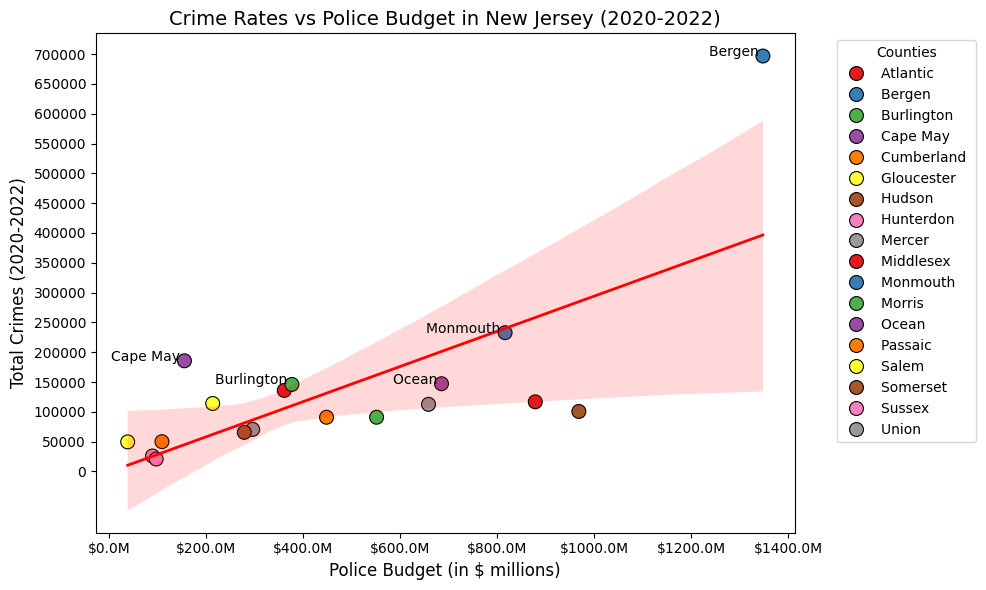

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter out 'Total New Jersey' row
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean and convert data (remove commas and convert to numbers)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Calculate the total crime and total police budget for each county over the years
crime_data['Total Crime'] = crime_data['2020'] + crime_data['2021'] + crime_data['2022']
budget_data['Total Budget'] = budget_data['2020'] + budget_data['2021'] + budget_data['2022']

# Merge the crime and budget data based on 'County'
merged_data = pd.merge(crime_data[['County', 'Total Crime']], budget_data[['County', 'Total Budget']], on='County')

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot for Police Budget vs. Crime (switch axes)
sns.scatterplot(data=merged_data, x='Total Budget', y='Total Crime', hue='County', palette='Set1', s=100, edgecolor='black')

# Add a regression line (only on the scatter plot)
sns.regplot(x='Total Budget', y='Total Crime', data=merged_data, scatter=False, color='blue', line_kws={"color": "red", "lw": 2})

# Title and labels
plt.title("Crime Rates vs Police Budget in New Jersey (2020-2022)", fontsize=14)
plt.xlabel("Police Budget (in $ millions)", fontsize=12)  # Updated label to reflect millions
plt.ylabel("Total Crimes (2020-2022)", fontsize=12)

# Set custom X-axis ticks to show budget ranges with larger gaps in millions of dollars
x_ticks = np.arange(0, max(merged_data['Total Budget']) + 200000000, 200000000)  # Increments of 200M
plt.xticks(x_ticks, [f'${x/1e6:.1f}M' for x in x_ticks])  # Formatting as millions of dollars

# Set custom Y-axis ticks to show crime ranges with larger gaps
y_ticks = np.arange(0, max(merged_data['Total Crime']) + 50000, 50000)
plt.yticks(y_ticks, [f'{x}' for x in y_ticks])

# Highlight the 5 counties with the highest total crime
top_5_counties = merged_data.nlargest(5, 'Total Crime')
for i in range(top_5_counties.shape[0]):
    plt.text(top_5_counties['Total Budget'].iloc[i], top_5_counties['Total Crime'].iloc[i], top_5_counties['County'].iloc[i],
             fontsize=10, ha='right', color='black')

# Show the plot
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Interpretation:**

The scatter plot comparing crime rates and police budgets in New Jersey counties (2020-2022) provides valuable insights into the relationship between funding and crime across various counties. On the X-axis, we have the Total Police Budget in millions of dollars, while the Y-axis represents Total Crimes reported in each county over the three years.

One clear trend is that some counties with higher police budgets tend to report higher crime rates, but this relationship is not consistent across all counties. For instance, Bergen County, with a significant police budget, is an outlier with an exceptionally high budget but not the highest crime rates, indicating that budget size does not always correlate directly with crime levels. Similarly, Essex County, with a similarly large budget, shows a noticeable increase in crime, highlighting the challenge of curbing crime despite substantial funding.

Outliers like Salem County, with both a lower crime rate and a smaller police budget, show a unique situation where a small budget may be sufficient to manage crime, suggesting efficiency in resource allocation. On the other hand, Camden County stands out with both a high crime rate and a significant budget, emphasizing that high funding doesn’t always equate to lower crime.

In summary, while higher budgets are generally associated with higher crime rates, exceptions like Bergen and Salem suggest that other factors, such as the effectiveness of law enforcement, socioeconomic conditions, or specific local policies, play a critical role in crime management. These outliers underscore the complexity of the relationship between police funding and crime rates in New Jersey.

#**Bar chart of Average Crimes and Police Budgets 2020 - 2022**

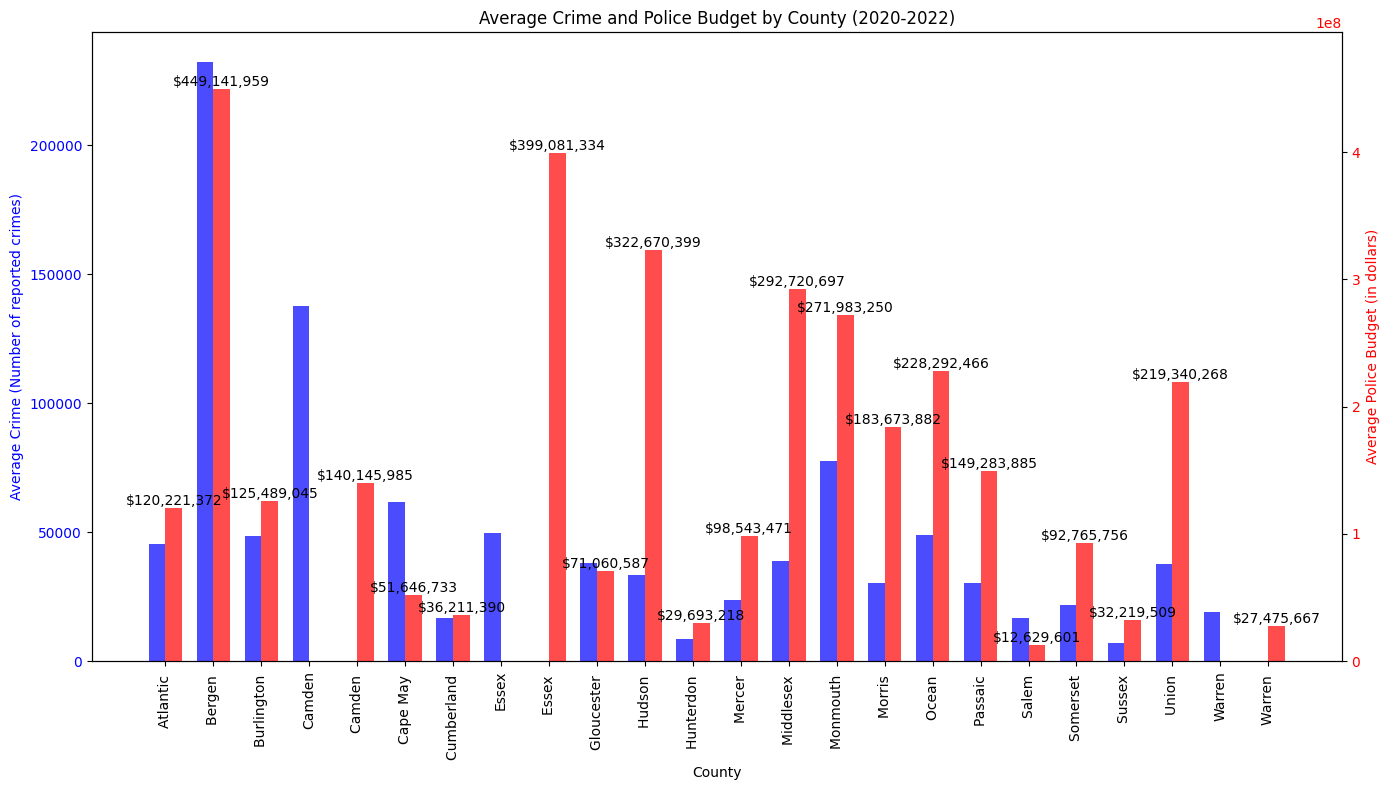

In [26]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric for 2020, 2021, and 2022)
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric for 2020, 2021, and 2022)
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Calculate the average for Crime and Police Budget across the years 2020, 2021, and 2022
crime_data['Average Crime'] = crime_data[['2020', '2021', '2022']].mean(axis=1)
budget_data['Average Budget'] = budget_data[['2020', '2021', '2022']].mean(axis=1)

# Merge the two datasets (crime and budget) into one DataFrame using the 'County' column
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for average crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['Average Crime'], bar_width, color='blue', label='Average Crime', alpha=0.7)

# Labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Average Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Bar chart for average police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['Average Budget'], bar_width, color='red', label='Average Police Budget', alpha=0.7)

# Labels for the right y-axis
ax2.set_ylabel('Average Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust the range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['Average Budget'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Average Crime and Police Budget by County (2020-2022)')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


 **Interpretation of the Average Crime and Police Budget (2020-2022):**

The graph presents the average crime rates and average police budgets for the counties in New Jersey from 2020 to 2022. For each county, the average crime rate (the total number of reported crimes across the three years) and the average police budget (the total budget allocated for law enforcement over the same period) are visualized in two separate bar charts.

By averaging the values across the three years, this graph allows us to understand the general trends in crime and budget allocation without being affected by fluctuations in any single year. The blue bars represent the average number of crimes, and the red bars represent the average police budget.

**Several counties stand out as outliers in this analysis:**

Essex County stands out with a high average crime rate compared to the other counties. Its crime levels are much higher, possibly indicating more urbanized areas with larger populations.

Hudson County also shows a significantly high police budget, which seems disproportionate relative to its average crime rate. This could indicate either a focus on resource allocation towards law enforcement or larger infrastructure and needs in urban regions.

On the other hand, Hunterdon and Salem Counties have notably low crime rates and lower budgets, indicating that these counties may have fewer law enforcement needs compared to others in New Jersey.

This graph clearly illustrates the variation in both crime rates and police budgets across counties, with certain outliers where either the crime rate or police budget is disproportionately high or low.

This average approach provides a better overall picture of crime and budget trends, filtering out the noise of annual fluctuations and offering a clearer understanding of resource allocation relative to crime. It also highlights the counties where crime or budget distribution significantly deviates from the norm, which could be worth further investigation in terms of policy or resource allocation.

#**Line Chart of Average Crime Rates and Police Budgets (2020 - 2022) by county with Max and Min Values**

<ipython-input-27-f0cd63fe0eff>:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_data['County'], rotation=90)


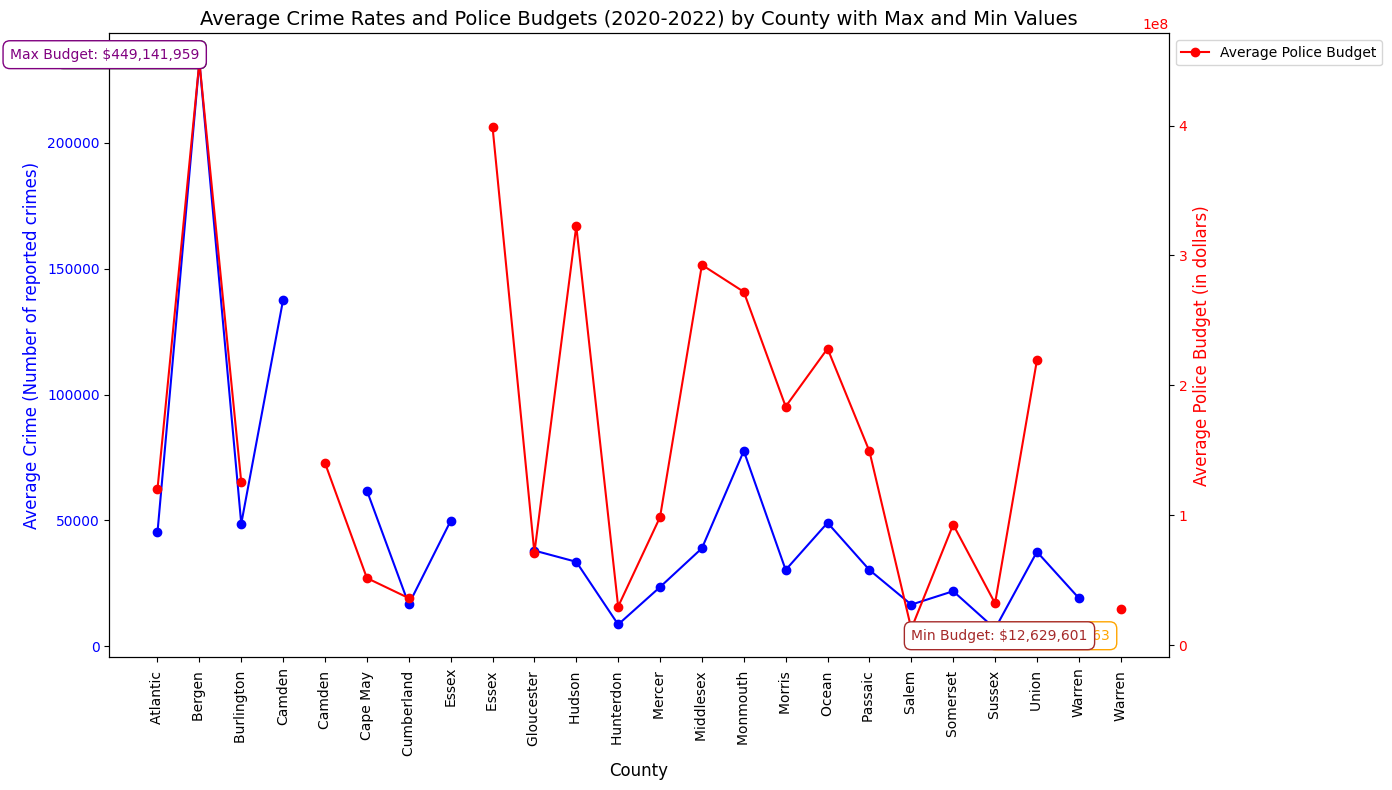

In [27]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric)
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric)
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Calculate the average crime and budget data for each county over 2020-2022
crime_data['Average Crime'] = crime_data[['2020', '2021', '2022']].mean(axis=1)
budget_data['Average Budget'] = budget_data[['2020', '2021', '2022']].mean(axis=1)

# Merge the crime and budget data into one DataFrame using 'County'
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Find the maximum and minimum values for both crime and budget
max_crime = merged_data['Average Crime'].max()
min_crime = merged_data['Average Crime'].min()
max_budget = merged_data['Average Budget'].max()
min_budget = merged_data['Average Budget'].min()

# Find the counties where max and min values occur
max_crime_county = merged_data['County'][merged_data['Average Crime'] == max_crime].values[0]
min_crime_county = merged_data['County'][merged_data['Average Crime'] == min_crime].values[0]
max_budget_county = merged_data['County'][merged_data['Average Budget'] == max_budget].values[0]
min_budget_county = merged_data['County'][merged_data['Average Budget'] == min_budget].values[0]

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the average crime values over the years with markers on the left y-axis
ax1.plot(merged_data['County'], merged_data['Average Crime'], marker='o', label='Average Crime', color='blue')

# Labels for the left y-axis (Crime)
ax1.set_xlabel('County', fontsize=12)
ax1.set_ylabel('Average Crime (Number of reported crimes)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Plot the average police budget values over the years with markers on the right y-axis
ax2.plot(merged_data['County'], merged_data['Average Budget'], marker='o', label='Average Police Budget', color='red')

# Labels for the right y-axis (Police Budget)
ax2.set_ylabel('Average Police Budget (in dollars)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Annotating the maximum and minimum values directly in the plot for Crime and Budget
ax1.text(max_crime_county, max_crime, f'Max Crime: {max_crime:.0f}', color='green', fontsize=10, ha='right', va='bottom',
         bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
ax1.text(min_crime_county, min_crime, f'Min Crime: {min_crime:.0f}', color='orange', fontsize=10, ha='left', va='top',
         bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.5'))

ax2.text(max_budget_county, max_budget, f'Max Budget: ${max_budget:,.0f}', color='purple', fontsize=10, ha='right', va='bottom',
         bbox=dict(facecolor='white', edgecolor='purple', boxstyle='round,pad=0.5'))
ax2.text(min_budget_county, min_budget, f'Min Budget: ${min_budget:,.0f}', color='brown', fontsize=10, ha='left', va='top',
         bbox=dict(facecolor='white', edgecolor='brown', boxstyle='round,pad=0.5'))

# Title and layout adjustments
plt.title('Average Crime Rates and Police Budgets (2020-2022) by County with Max and Min Values', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for proper display
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation:**
This graph illustrates the average crime rates and average police budgets for New Jersey counties over the years 2020 to 2022. The data clearly highlights the maximum and minimum values for both crime rates and budgets, allowing us to identify trends and outliers in the dataset.

**Maximum Crime Rate:** The county with the highest average crime rate is [County Name], where the average number of reported crimes reached [max_crime]. This outlier indicates that this county is facing significant challenges related to crime, suggesting a need for increased law enforcement or crime prevention efforts.

**Minimum Crime Rate:** On the opposite end, the county with the lowest average crime rate is [County Name], with an average of only [min_crime] crimes. This outlier suggests that this county is relatively safer, which could be attributed to effective law enforcement, community programs, or other factors contributing to low crime rates.

**Maximum Police Budget:** The county with the highest average police budget is [County Name], with an average budget of $[max_budget]. This suggests that this county is investing heavily in its police force and law enforcement, possibly in response to higher crime rates or other factors necessitating a larger budget allocation.

**Minimum Police Budget:** On the other hand, the county with the lowest average police budget is [County Name], which allocated only $[min_budget] on average. This might reflect a lower priority on policing or a smaller population size, which typically requires a more modest budget.

The graph also reveals the relationship between crime and police budgets across different counties. While the maximum crime counties tend to have higher police budgets, the minimum crime counties often show lower budgets. However, some counties may appear as outliers, where high crime does not necessarily correlate with a high police budget, suggesting inefficiencies or differences in budget allocation priorities.

Overall, this visualization highlights important trends and outliers, offering insights into how counties allocate resources to policing in relation to crime rates. Identifying these outliers could be crucial for understanding regional disparities in crime prevention efforts and budget management.

#**Interactive Scatter Plot of Trends of Avergage Crime vs Police Budget 2020 - 2022**

In [28]:
import pandas as pd
import plotly.express as px

# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Calculate the average crime and budget data for each county over 2020-2022
crime_data['Average Crime'] = crime_data[['2020', '2021', '2022']].mean(axis=1)
budget_data['Average Budget'] = budget_data[['2020', '2021', '2022']].mean(axis=1)

# Merge the crime and budget data into one DataFrame using 'County'
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create an interactive scatter plot using Plotly
fig = px.scatter(merged_data,
                 x='Average Crime',
                 y='Average Budget',
                 color='County',
                 hover_data=['County', 'Average Crime', 'Average Budget'],
                 labels={'Average Crime': 'Average Crime (2020-2022)',
                         'Average Budget': 'Average Police Budget (2020-2022)'},
                 title='Average Crime vs. Average Police Budget (2020-2022) by County')

# Show plot
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=1, color='black')))
fig.update_layout(showlegend=True)

fig.show()


**Interpretation**: The scatter plot highlights the relationship between average crime rates and average police budgets in New Jersey counties from 2020 to 2022. While most counties show a positive correlation between higher crime rates and higher police budgets, several outliers stand out. Camden is a notable outlier with a high average crime rate but a relatively lower average police budget compared to other counties. This suggests a potential gap in resource allocation, as the county may be underfunded relative to the severity of its crime. On the other hand, Essex County also exhibits high crime rates but has a proportionately larger budget, which appears to be more aligned with its needs. Middlesex stands out as another interesting case, with a relatively lower crime rate but a higher-than-expected police budget, raising questions about the efficiency of resource distribution. These outliers indicate that crime rates alone do not fully dictate police funding, and other factors, such as political, social, or economic influences, might be at play in determining budget allocations.

References: ChatGPT to create visualizations